In [3]:
import numpy as np

def extract_mel_spectrogram(y, sr, hop_length, show_plt: bool) -> np.ndarray:
    # We are better at detecting differences in lower frequencies than higher frequencies.
    # A mel spectrogram is a spectrogram where the frequencies are converted to the mel scale.
    
    # Where-as the mel-spectrogram has mel filters applied which reduces the number of bands to n_mels (typically 32-128)
    mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=hop_length, n_mels=128)
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    # mel_spect = librosa.amplitude_to_db(mel_spect, ref=np.max)
    
    if show_plt:
        plt.figure(figsize=(6, 4))
        librosa.display.specshow(mel_spect, sr=sr, y_axis='mel', fmax=8000, x_axis='time')
        plt.title('Mel Spectrogram')
        plt.colorbar(format='%+2.0f dB')
        plt.show()
        
    return mel_spect

In [4]:
def spectrogram_to_greyscale(spectrogram):
    """
    Convert a spectrogram to a greyscale image.
    
    Parameters:
    spectrogram (np.ndarray): 2D array of the spectrogram in dB scale.
    
    Returns:
    np.ndarray: 3D array (H, W, 1) representing the greyscale image.
    """
    # Normalize the spectrogram to the range [0, 255]
    norm_spectrogram = (spectrogram - spectrogram.min()) / (spectrogram.max() - spectrogram.min())
    greyscale_image = (norm_spectrogram * 255)
    
    # Add the channel dimension
    greyscale_image = np.expand_dims(greyscale_image, axis=-1)
    #resized_greyscale_image_3ch = np.stack([resized_greyscale_image]*3, axis=-1) < stash grayscale on 3 channels
    
    return greyscale_image

In [35]:
def extract_chroma_stft(y, sr, hop_length=2048, n_fft=2048, n_chroma=12) -> np.ndarray:
    stft = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))**2
    chroma_stft = librosa.feature.chroma_stft(S=stft, n_chroma=n_chroma, sr=sr)
    
    return chroma_stft

def extract_spectral_contrast(y, sr, hop_length=2048, n_fft=2048) -> np.ndarray:
    stft = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))
    spec_contr = librosa.feature.spectral_contrast(S=stft, sr=sr)
    
    return spec_contr

In [29]:
%run commons.ipynb

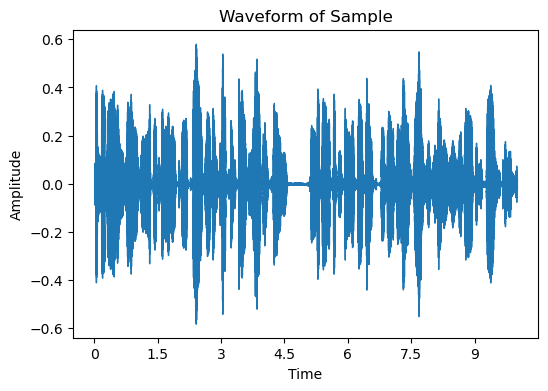

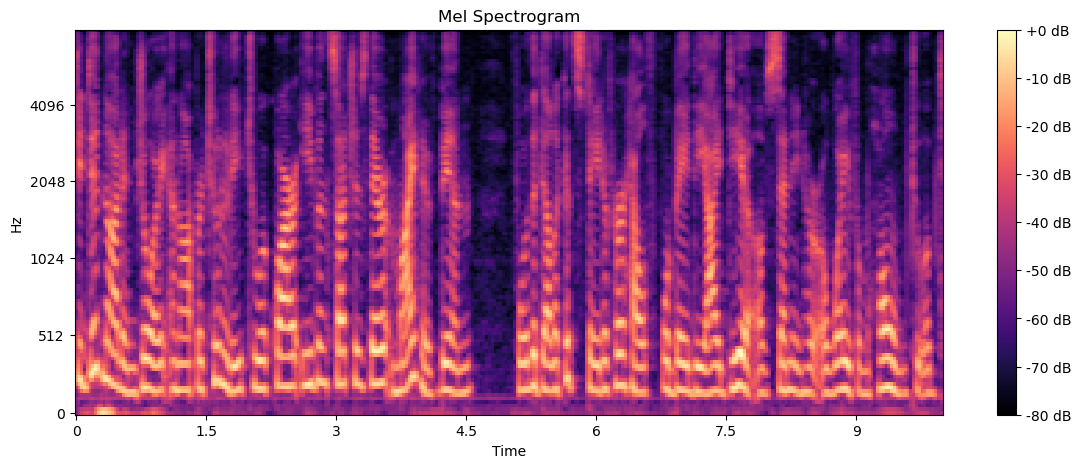

[[-51.37556  -42.554165 -34.871468 ... -45.63079  -47.52459  -45.207848]
 [-50.340225 -43.37661  -38.912636 ... -47.61637  -47.98584  -49.189304]
 [-50.02943  -49.38263  -53.400627 ... -53.306595 -52.398476 -48.886913]
 ...
 [-52.273605 -53.33602  -60.85238  ... -74.082466 -54.575417 -49.897156]
 [-53.76548  -55.543594 -64.366974 ... -79.72297  -59.258816 -54.818718]
 [-65.18476  -68.927414 -77.225334 ... -80.       -71.77246  -65.01732 ]]
(128, 313)


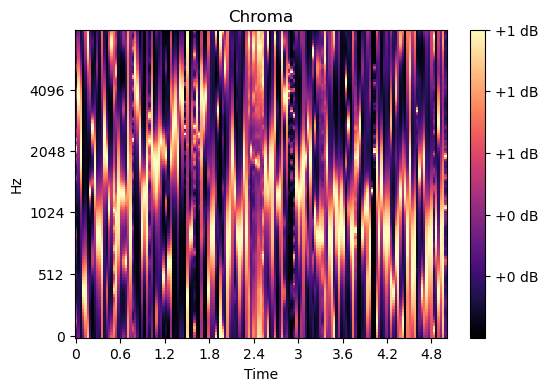

[[0.24007367 0.32830217 0.08498474 ... 0.36696675 0.7916598  0.2621222 ]
 [0.22571556 0.3100978  0.08104159 ... 0.38006678 0.8197426  0.30191267]
 [0.21490002 0.29302245 0.07818315 ... 0.39445874 0.8570646  0.26943898]
 ...
 [0.30174866 0.3834077  0.10429738 ... 0.3339837  0.75509757 0.25273135]
 [0.242427   0.36543193 0.09655018 ... 0.34403086 0.75713414 0.21651213]
 [0.244397   0.34698084 0.09011776 ... 0.3549991  0.7724939  0.22403304]]
(128, 157)


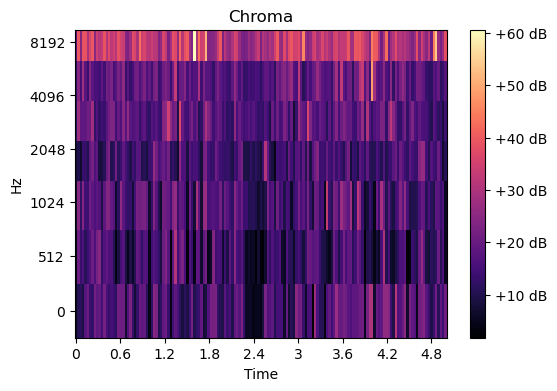

[[ 4.78357543 10.52437688 11.25121678 ... 18.96213356 13.7353028
  21.13216866]
 [ 3.8411576  20.44378069 12.89833497 ... 10.94598865 16.06303232
   5.34162203]
 [ 6.59395822 24.38821674 12.30450451 ... 13.33411687 15.81309083
   5.3924171 ]
 ...
 [11.07632572 27.50959027 18.99488735 ... 13.1781152   8.26475703
  14.09366434]
 [11.72210467 23.92058054 14.6614257  ... 11.61429485 13.24513769
  17.37159363]
 [17.67962418 39.52995342 24.28285432 ... 22.42120041 26.63143656
  37.93934843]]
(7, 157)


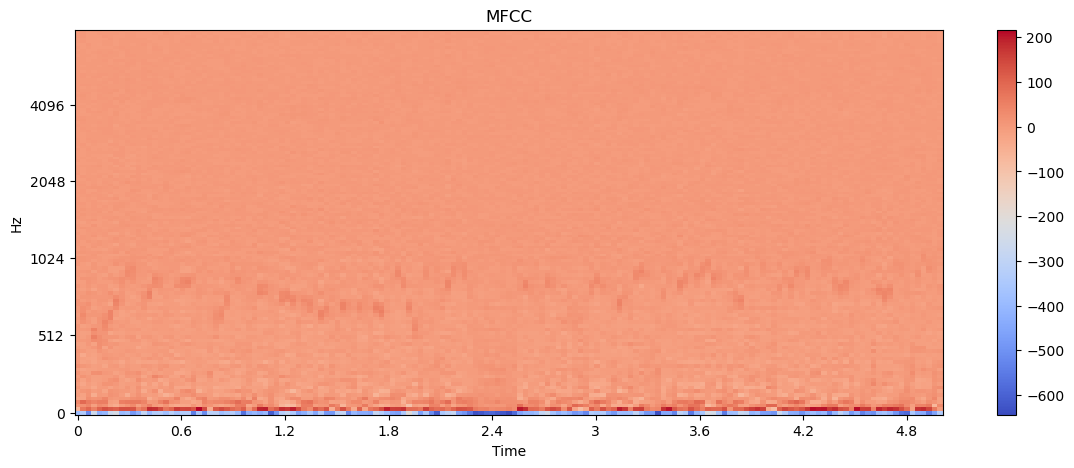

array([[-3.8207498e+02, -3.4054102e+02, -5.1496924e+02, ...,
        -5.4570380e+02, -4.5725919e+02, -3.3629681e+02],
       [-6.1051781e+01,  6.5808418e+01,  9.7244873e+01, ...,
         1.4998695e+02,  6.4244476e+01, -3.3504343e+00],
       [ 1.0551580e+01,  2.0849152e+01,  4.1457962e+01, ...,
         6.3094570e+01, -6.7662056e+01,  3.2010796e+01],
       ...,
       [-1.5896606e+00,  2.4146576e+00, -1.9576607e+00, ...,
         2.2651320e+00,  9.3559575e-01, -2.6306953e+00],
       [-1.0044832e+00,  2.5441303e+00, -3.4876232e+00, ...,
         5.6467819e-01,  6.2973785e-01, -4.5029469e+00],
       [ 8.9274597e-01,  3.3061390e+00, -2.3564720e+00, ...,
        -1.6621246e+00, -4.5893669e-01,  1.1486291e+00]], dtype=float32)

In [46]:
import matplotlib.pyplot as plt
import librosa

sr = 16000

# show different features on plots for presentation purposes
sample, _ = librosa.load(path='samples_utils/speaker_Speaker0043_1.wav', sr=sr)
# sample, _ = librosa.load(path='data/LibreSpeech/sample_audio_files/dev-other/random_concatenated_sample_speaker_3915_15s_1.wav', sr=sr)


plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
plt.title(f"Waveform of Sample")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
librosa.display.waveshow(sample[5*sr:15*sr], sr=sr)
#waveplot? 

# Display the waveform

mel = extract_mel_spectrogram(sample[5*sr:15*sr], sr, 512, True)
plt.show()

print(mel)
print(mel.shape)



chroma = extract_chroma_stft(sample[5*sr:15*sr], sr, 1024, 512, 128)


plt.figure(figsize=(6, 4))
librosa.display.specshow(chroma, sr=sr, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Chroma')
plt.colorbar(format='%+2.0f dB')
plt.show()
print(chroma)
print(chroma.shape)

chroma = extract_spectral_contrast(sample[5*sr:15*sr], sr, 1024, 512)


plt.figure(figsize=(6, 4))
librosa.display.specshow(chroma, sr=sr, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Chroma')
plt.colorbar(format='%+2.0f dB')
plt.show()
print(chroma)
print(chroma.shape)

extract_MFCCs(sample[5*sr:15*sr], 16000, 512, 1024, n_mfcc=128, show_plt=True)


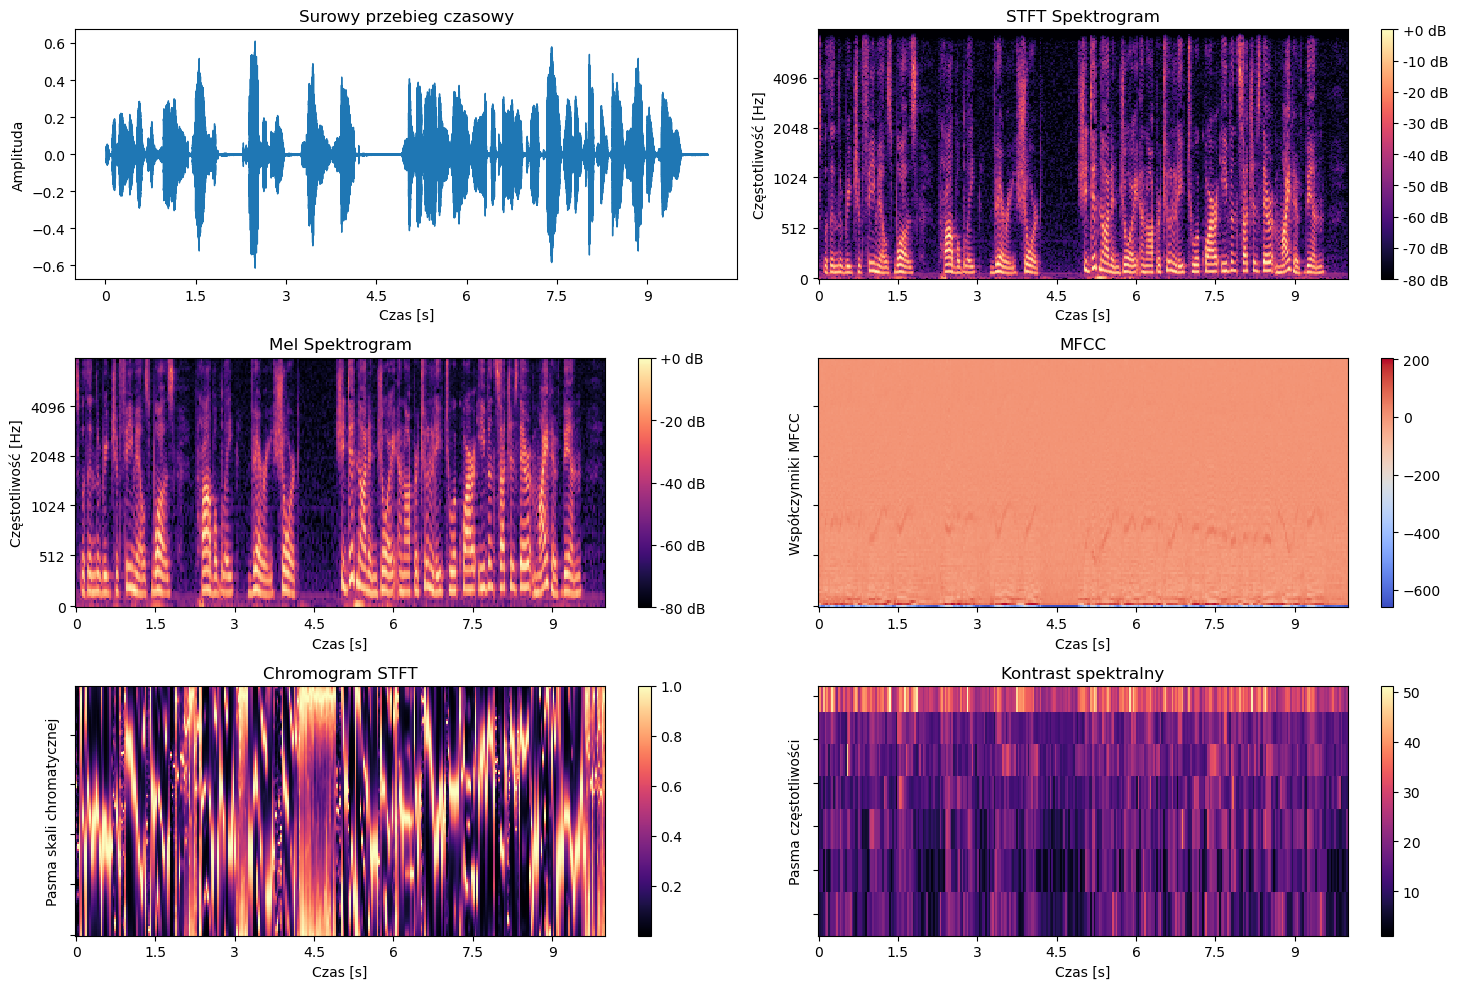

In [67]:
import matplotlib.pyplot as plt
import librosa
import librosa.display

# Zakładamy, że masz już załadowany sygnał audio `y` i częstotliwość próbkowania `sr`

# Funkcje do ekstrakcji cech (extract_feature1, extract_feature2, itd.)
# ... (tutaj wklej swoje funkcje)

# Parametry ekstrakcji cech
hop_length = 512
n_fft = 512
n_mels = 128
n_mfcc = 128
n_chroma = 128
show_plt = False
sr=16000
y = sample[0:10*sr]
            
# Ekstrakcja cech
features = {
    'Waveform': y,
    'STFT Spektrogram': extract_stft_spectrogram(y=y, sr=sr, hop_length=hop_length, show_plt=show_plt, n_fft=n_fft),
    'Mel Spektrogram': extract_mel_spectrogram(y=y, sr=sr, hop_length=hop_length, show_plt=show_plt, n_fft=n_fft, n_mels=n_mels),
    'MFCC': extract_MFCCs(y=y, sr=sr, show_plt=show_plt, n_mfcc=n_mfcc, hop_length=hop_length, n_fft=n_fft),
    'Chromogram STFT': extract_chroma_stft(y=y, sr=sr,hop_length=hop_length, n_fft=n_fft, n_chroma=n_chroma),
    'Kontrast spektralny': extract_spectral_contrast(y=y, sr=sr, hop_length=hop_length, n_fft=n_fft)
}

# Wizualizacja
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
# fig.suptitle('Wizualizacja sygnału oraz wyodrębionych z niego cech spektralnych', fontsize=16)

for i, (feature_name, feature_data) in enumerate(features.items()):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    

    if feature_name == 'Waveform':
        librosa.display.waveshow(feature_data, sr=sr, ax=ax)
        ax.set_title('Surowy przebieg czasowy')
        ax.set_xlabel('Czas [s]')
        ax.set_ylabel('Amplituda')  # Ustawiamy etykietę osi y na "Częstotliwość [Hz]"
    else:
        
        img = librosa.display.specshow(feature_data, sr=sr, x_axis='s', y_axis='mel' if feature_name != 'Kontrast spektralny' else 'mel', ax=ax)
        
        
        ax.set_title(feature_name)
        # librosa.display.specshow(feature_data, sr=sr, x_axis='time', y_axis='linear', ax=ax)
        ax.set_xlabel('Czas [s]')
        ax.set_ylabel('Częstotliwość [Hz]') 
        

        # # Dodawanie colorbara z warunkowym formatowaniem
        if feature_name in ['STFT Spektrogram', 'Mel Spektrogram']:
            fig.colorbar(img, ax=ax, format="%+2.f dB")
        # else:
        #     fig.colorbar(img, ax=ax)  # Bez formatowania dla MFCC, Chroma STFT i Spectral Contrast
    
        if feature_name == 'Kontrast spektralny':
            ax.set_yticklabels([])
            ax.set_ylabel('Pasma częstotliwości')
            fig.colorbar(img, ax=ax)
        
        if feature_name == 'Chromogram STFT':
            ax.set_yticklabels([])
            ax.set_ylabel('Pasma skali chromatycznej')
            fig.colorbar(img, ax=ax) # zgodnie z dokumentajci librosy 
        
        if feature_name == 'MFCC':
            ax.set_yticklabels([])
            ax.set_ylabel('Współczynniki MFCC')
            fig.colorbar(img, ax=ax)

for ax in axes.flat:
    if len(ax.images) > 0:  # Sprawdź, czy na wykresie jest obrazek (spektrogram)
        fig.colorbar(ax.images[0], ax=ax, format="%+2.f dB" if ax.get_ylabel() == 'Częstotliwość [Hz]' else None)
        
plt.tight_layout()
plt.show() 

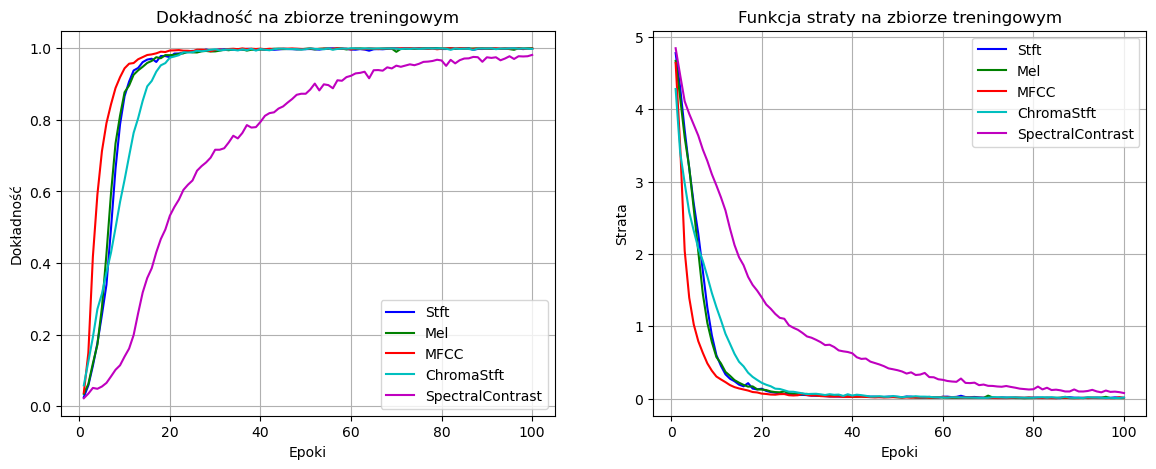

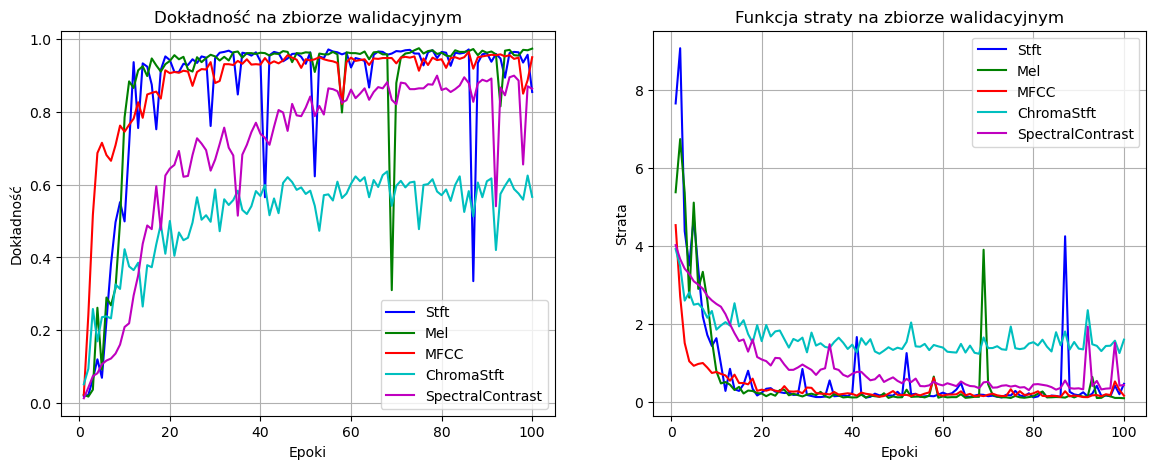

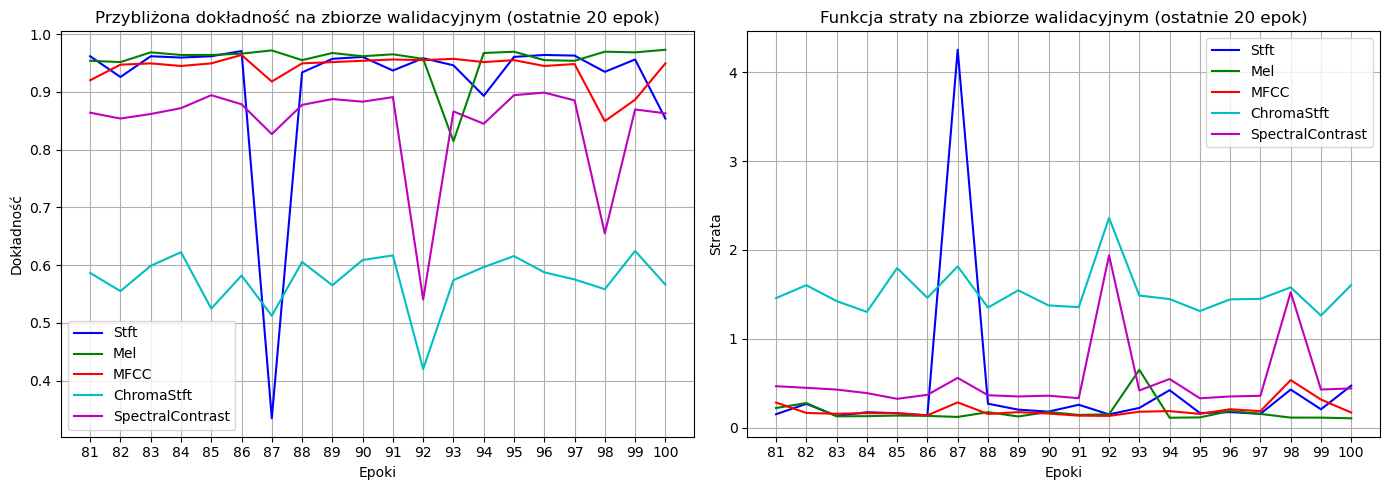

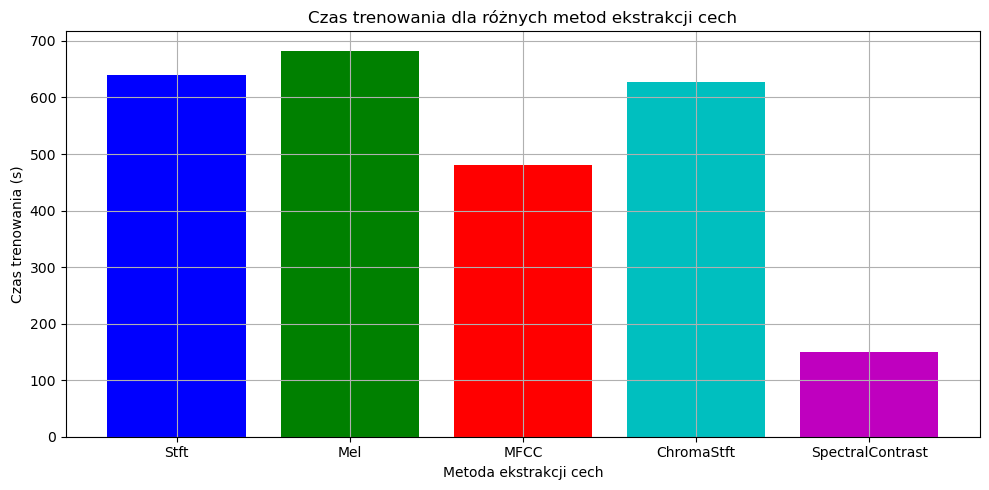

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# List of numpy files
history_files = [
    'data/50_speakers_dataset/50_speakers_audio_data/results/history_30s-Mel-BetterCNN-1024hops-512nfft-434.3s_traintime.npy',
    'data/50_speakers_dataset/50_speakers_audio_data/results/history_30s-Mel-MyCNN-1024hops-512nfft-682.8s_traintime.npy',
    'data/50_speakers_dataset/50_speakers_audio_data/results/history_30s-MFCC-MyCNN-1024hops-512nfft-480.7s_traintime.npy',
    'data/50_speakers_dataset/50_speakers_audio_data/results/history_30s-ChromaStft-MyCNN-1024hops-512nfft-626.7s_traintime.npy',
    'data/50_speakers_dataset/50_speakers_audio_data/results/history_30s-SpectralContrast-MyCNN-1024hops-512nfft-150.5s_traintime.npy']


# Dictionary to hold histories
histories = {}

# Extract feature names from file names
for file in history_files:
    feature_name = file.split("-")[1]  # Extract the part after "30s-"
    history = np.load(file, allow_pickle=True).item()
    histories[feature_name] = history


colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Create subplots for training metrics
fig1, axs1 = plt.subplots(1, 2, figsize=(14, 5))

# Plot training accuracy and loss
for i, (feature_name, history) in enumerate(histories.items()):
    epochs = range(1, len(history['accuracy']) + 1)
    axs1[0].plot(epochs, history['accuracy'], color=colors[i], label=feature_name)
    axs1[1].plot(epochs, history['loss'], color=colors[i], label=feature_name)

axs1[0].set_title('Dokładność na zbiorze treningowym')
axs1[0].set_xlabel('Epoki')
axs1[0].set_ylabel('Dokładność')
axs1[0].legend()
axs1[0].grid(True)

axs1[1].set_title('Funkcja straty na zbiorze treningowym')
axs1[1].set_xlabel('Epoki')
axs1[1].set_ylabel('Strata')
axs1[1].legend()
axs1[1].grid(True)

# Create subplots for validation metrics
fig2, axs2 = plt.subplots(1, 2, figsize=(14, 5))

# Plot validation accuracy and loss
for i, (feature_name, history) in enumerate(histories.items()):
    epochs = range(1, len(history['val_accuracy']) + 1)
    axs2[0].plot(epochs, history['val_accuracy'], color=colors[i], label=feature_name)
    axs2[1].plot(epochs, history['val_loss'], color=colors[i], label=feature_name)

axs2[0].set_title('Dokładność na zbiorze walidacyjnym')
axs2[0].set_xlabel('Epoki')
axs2[0].set_ylabel('Dokładność')
axs2[0].legend()
axs2[0].grid(True)

axs2[1].set_title('Funkcja straty na zbiorze walidacyjnym')
axs2[1].set_xlabel('Epoki')
axs2[1].set_ylabel('Strata')
axs2[1].legend()
axs2[1].grid(True)

# Create a new figure for zoomed validation accuracy and loss
fig3, axs3 = plt.subplots(1, 2, figsize=(14, 5))

# Plot zoomed validation accuracy and loss for the last 20 epochs
for i, (feature_name, history) in enumerate(histories.items()):
    start_epoch = max(0, len(history['val_accuracy']) - 20)
    epochs = range(start_epoch + 1, len(history['val_accuracy']) + 1)
    val_accuracy_zoomed = history['val_accuracy'][start_epoch:]
    val_loss_zoomed = history['val_loss'][start_epoch:]
    axs3[0].plot(epochs, val_accuracy_zoomed, color=colors[i], label=feature_name)
    axs3[1].plot(epochs, val_loss_zoomed, color=colors[i], label=feature_name)

axs3[0].set_title('Przybliżona dokładność na zbiorze walidacyjnym (ostatnie 20 epok)')
axs3[0].set_xlabel('Epoki')
axs3[0].set_ylabel('Dokładność')
axs3[0].legend()
axs3[0].grid(True)

axs3[1].set_title('Funkcja straty na zbiorze walidacyjnym (ostatnie 20 epok)')
axs3[1].set_xlabel('Epoki')
axs3[1].set_ylabel('Strata')
axs3[1].legend()
axs3[1].grid(True)

# Set x-ticks to show only integer values
axs3[0].set_xticks(np.arange(start_epoch + 1, len(history['val_accuracy']) + 1, 1))
axs3[1].set_xticks(np.arange(start_epoch + 1, len(history['val_loss']) + 1, 1))


plt.tight_layout()
plt.show()


# Extract training times from file names
train_times = {}
for file in history_files:
    train_time = float(file.split("-")[-1].split("_")[0][:-1])  # Extract the part before "_traintime"
    feature_name = file.split("30s-")[1].split("-")[0]
    train_times[feature_name] = train_time

# ... (kod dla wykresów accuracy i loss bez zmian)

# Create a bar plot for training times
fig4, ax4 = plt.subplots(figsize=(10, 5))
ax4.bar(train_times.keys(), train_times.values(), color=colors)
ax4.set_title('Czas trenowania dla różnych metod ekstrakcji cech')
ax4.set_xlabel('Metoda ekstrakcji cech')
ax4.set_ylabel('Czas trenowania (s)')
ax4.grid(True)

plt.tight_layout()
plt.show()



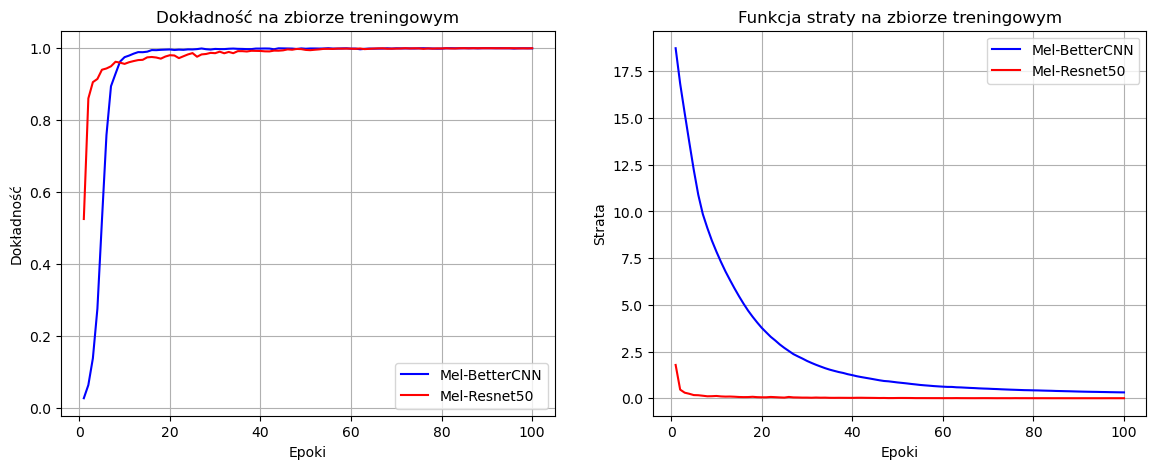

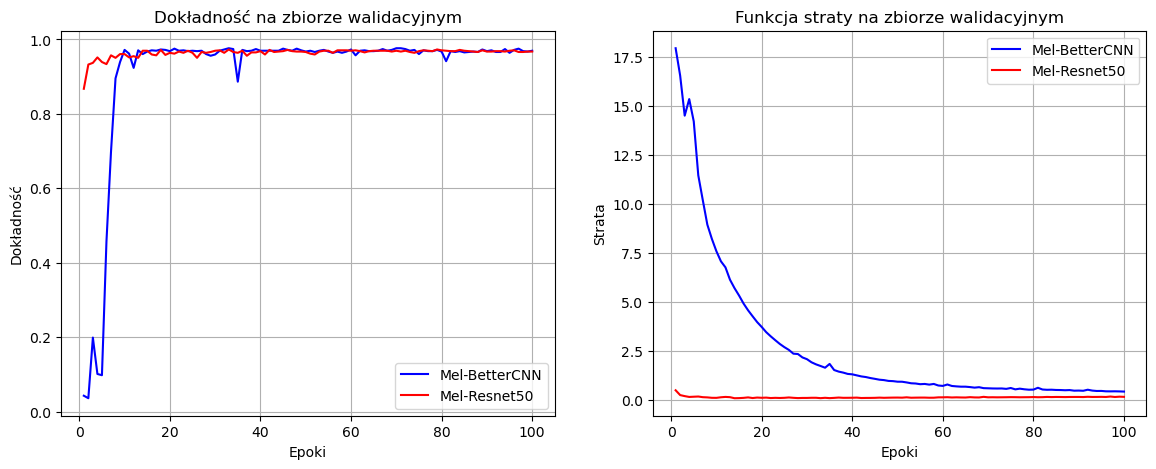

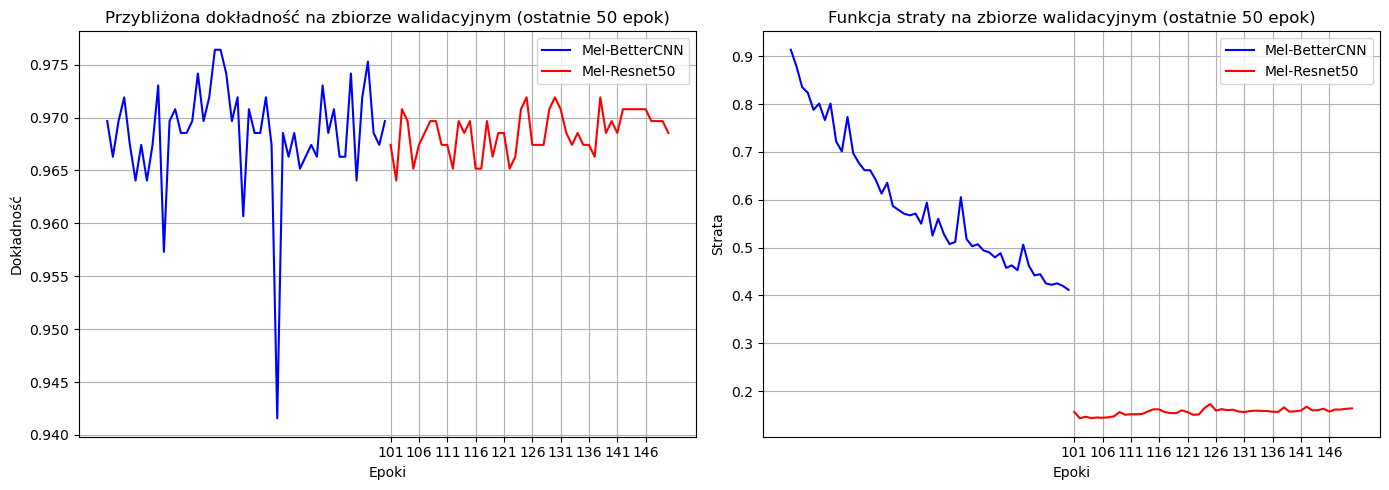

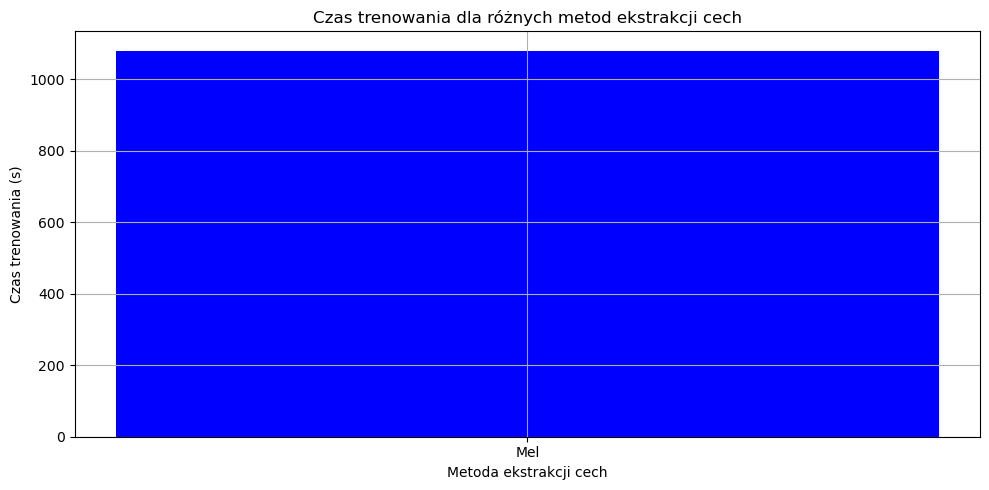

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# List of numpy files
history_files = [
    'data/LibreSpeech/train-clean-360/results/history_30s-Mel-BetterCNN-1024hops-512nfft-1589.7s_traintime.npy',
    'data/LibreSpeech/train-clean-360/results/history_30s-Mel-ResNet50-1024hops-512nfft-2604.3s_traintime.npy'
]

history_files = [
    'data/50_speakers_dataset/50_speakers_audio_data/results/history_30s-Mel-BetterCNN-1024hops-512nfft-434.3s_traintime.npy',
    'data/50_speakers_dataset/50_speakers_audio_data/results/history_30s-Mel-ResNet50-1024hops-512nfft-1080.0s_traintime.npy'
]

# Dictionary to hold histories
histories = {}
i=0
# Extract feature names from file names
for file in history_files:
    if i == 0:
        feature_name = file.split("30s-")[1].split("-")[0] + "-" + "BetterCNN" # Extract the part after "30s-"
    else:
        feature_name = file.split("30s-")[1].split("-")[0] + "-" + "Resnet50" # Extract the part after "30s-"
    i+=1
    history = np.load(file, allow_pickle=True).item()
    histories[feature_name] = history


colors = ['b', 'r', 'g', 'c', 'm', 'y', 'k']

# Create subplots for training metrics
fig1, axs1 = plt.subplots(1, 2, figsize=(14, 5))

# Plot training accuracy and loss
for i, (feature_name, history) in enumerate(histories.items()):
    epochs = range(1, len(history['accuracy'][:100]) + 1)
    axs1[0].plot(epochs, history['accuracy'][:100], color=colors[i], label=feature_name)
    axs1[1].plot(epochs, history['loss'][:100], color=colors[i], label=feature_name)

axs1[0].set_title('Dokładność na zbiorze treningowym')
axs1[0].set_xlabel('Epoki')
axs1[0].set_ylabel('Dokładność')
axs1[0].legend()
axs1[0].grid(True)

axs1[1].set_title('Funkcja straty na zbiorze treningowym')
axs1[1].set_xlabel('Epoki')
axs1[1].set_ylabel('Strata')
axs1[1].legend()
axs1[1].grid(True)

# Create subplots for validation metrics
fig2, axs2 = plt.subplots(1, 2, figsize=(14, 5))

# Plot validation accuracy and loss
for i, (feature_name, history) in enumerate(histories.items()):
    epochs = range(1, len(history['val_accuracy'][:100]) + 1)
    axs2[0].plot(epochs, history['val_accuracy'][:100], color=colors[i], label=feature_name)
    axs2[1].plot(epochs, history['val_loss'][:100], color=colors[i], label=feature_name)

axs2[0].set_title('Dokładność na zbiorze walidacyjnym')
axs2[0].set_xlabel('Epoki')
axs2[0].set_ylabel('Dokładność')
axs2[0].legend()
axs2[0].grid(True)

axs2[1].set_title('Funkcja straty na zbiorze walidacyjnym')
axs2[1].set_xlabel('Epoki')
axs2[1].set_ylabel('Strata')
axs2[1].legend()
axs2[1].grid(True)

# Create a new figure for zoomed validation accuracy and loss
fig3, axs3 = plt.subplots(1, 2, figsize=(14, 5))

# Plot zoomed validation accuracy and loss for the last 50 epochs
epochs_num = 50
for i, (feature_name, history) in enumerate(histories.items()):
    start_epoch = max(0, len(history['val_accuracy']) - epochs_num)
    epochs = range(start_epoch + 1, len(history['val_accuracy']) + 1)
    val_accuracy_zoomed = history['val_accuracy'][start_epoch:]
    val_loss_zoomed = history['val_loss'][start_epoch:]
    axs3[0].plot(epochs, val_accuracy_zoomed, color=colors[i], label=feature_name)
    axs3[1].plot(epochs, val_loss_zoomed, color=colors[i], label=feature_name)

axs3[0].set_title(f'Przybliżona dokładność na zbiorze walidacyjnym (ostatnie {epochs_num} epok)')
axs3[0].set_xlabel('Epoki')
axs3[0].set_ylabel('Dokładność')
axs3[0].legend()
axs3[0].grid(True)

axs3[1].set_title(f'Funkcja straty na zbiorze walidacyjnym (ostatnie {epochs_num} epok)')
axs3[1].set_xlabel('Epoki')
axs3[1].set_ylabel('Strata')
axs3[1].legend()
axs3[1].grid(True)

# Set x-ticks to show only integer values
axs3[0].set_xticks(np.arange(start_epoch + 1, len(history['val_accuracy']) + 1, 5))
axs3[1].set_xticks(np.arange(start_epoch + 1, len(history['val_loss']) + 1, 5))


plt.tight_layout()
plt.show()

# Extract training times from file names
train_times = {}
for file in history_files:
    train_time = float(file.split("-")[-1].split("_")[0][:-1])  # Extract the part before "_traintime"
    feature_name = file.split("30s-")[1].split("-")[0]
    train_times[feature_name] = train_time

# ... (kod dla wykresów accuracy i loss bez zmian)

# Create a bar plot for training times
fig4, ax4 = plt.subplots(figsize=(10, 5))
ax4.bar(train_times.keys(), train_times.values(), color=colors)
ax4.set_title('Czas trenowania dla różnych metod ekstrakcji cech')
ax4.set_xlabel('Metoda ekstrakcji cech')
ax4.set_ylabel('Czas trenowania (s)')
ax4.grid(True)

plt.tight_layout()
plt.show()


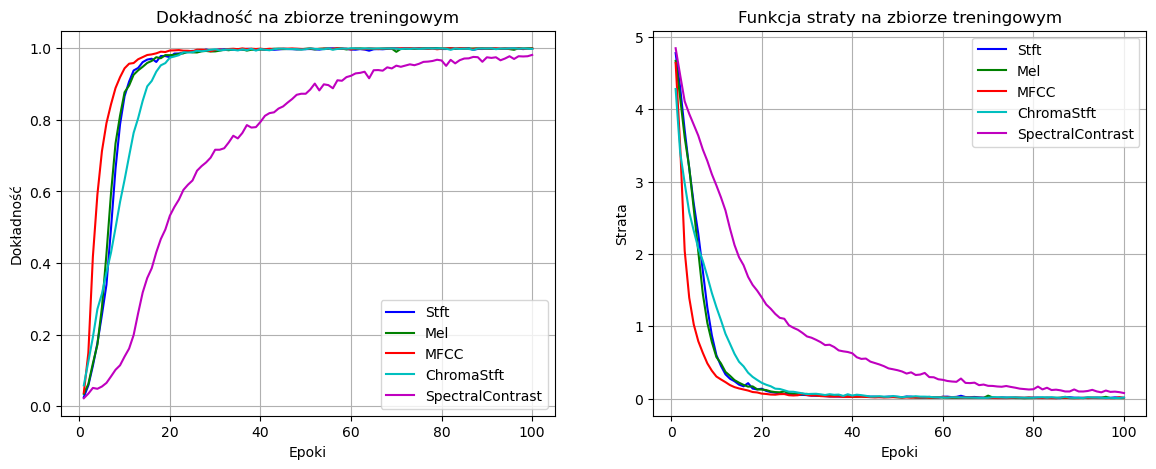

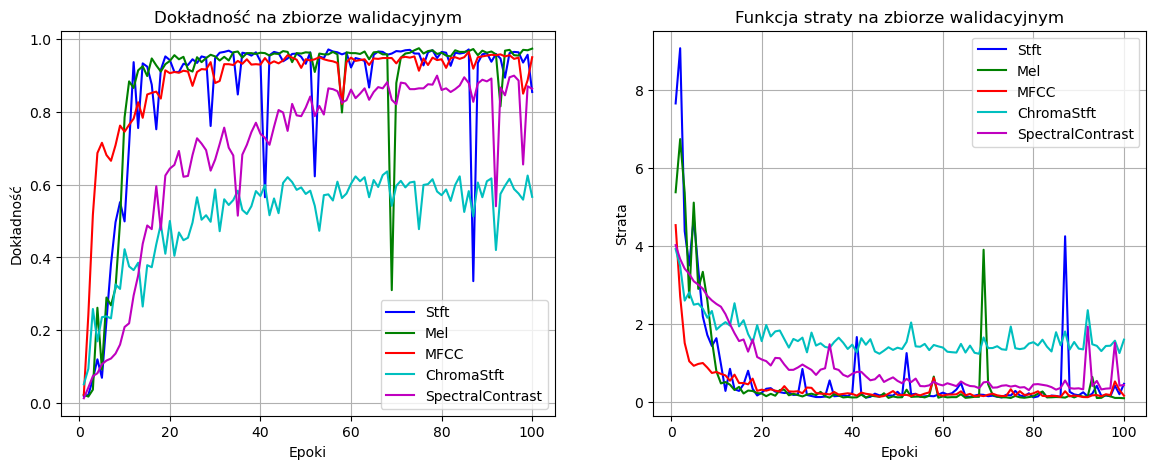

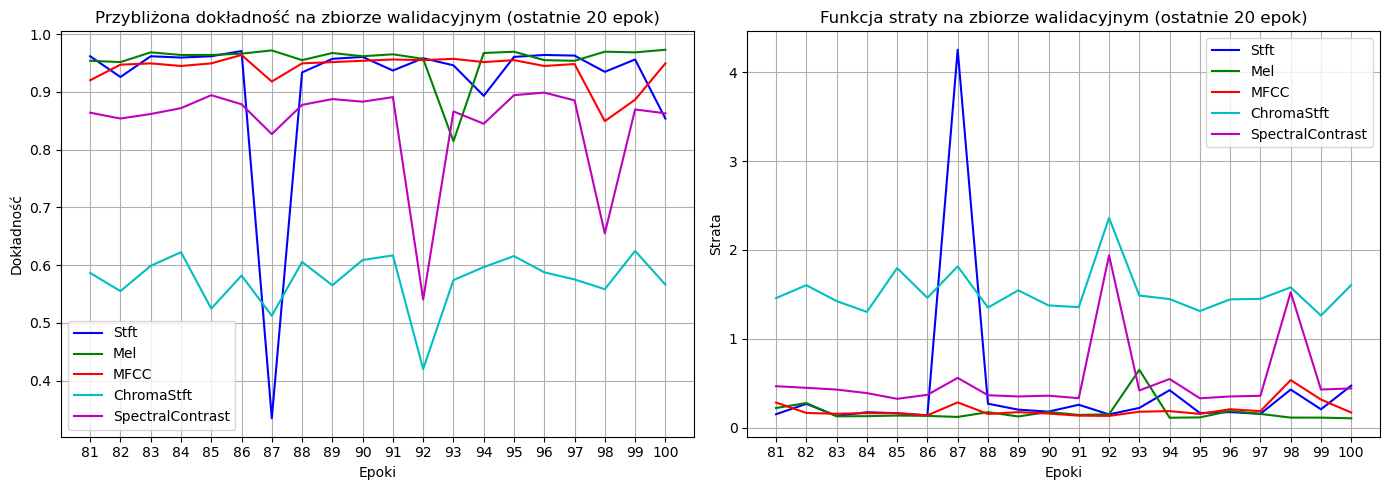

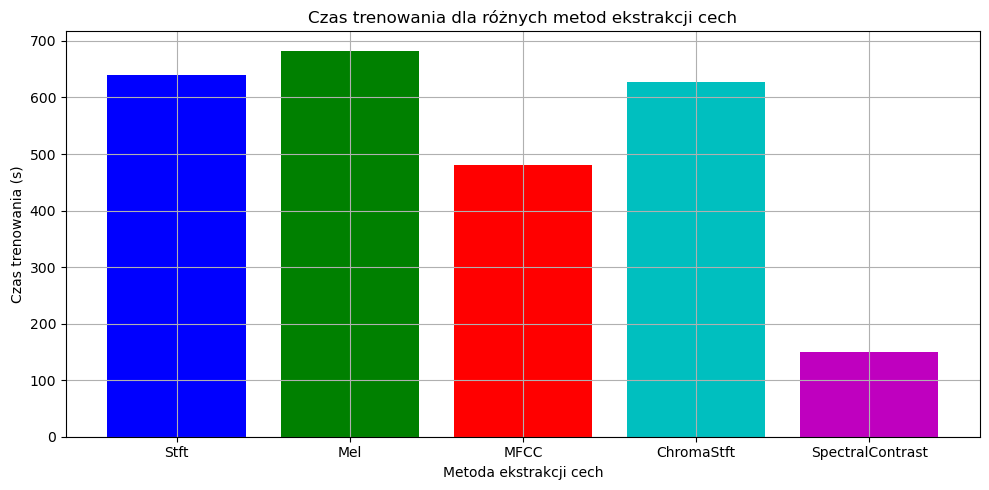

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# List of numpy files
history_files = [
    'data/50_speakers_dataset/50_speakers_audio_data/results/history_30s-Stft-MyCNN-1024hops-256nfft-639.6s_traintime.npy',
    'data/50_speakers_dataset/50_speakers_audio_data/results/history_30s-Mel-MyCNN-1024hops-512nfft-682.8s_traintime.npy',
    'data/50_speakers_dataset/50_speakers_audio_data/results/history_30s-MFCC-MyCNN-1024hops-512nfft-480.7s_traintime.npy',
    'data/50_speakers_dataset/50_speakers_audio_data/results/history_30s-ChromaStft-MyCNN-1024hops-512nfft-626.7s_traintime.npy',
    'data/50_speakers_dataset/50_speakers_audio_data/results/history_30s-SpectralContrast-MyCNN-1024hops-512nfft-150.5s_traintime.npy']


# Dictionary to hold histories
histories = {}

# Extract feature names from file names
for file in history_files:
    feature_name = file.split("-")[1]  # Extract the part after "30s-"
    history = np.load(file, allow_pickle=True).item()
    histories[feature_name] = history


colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Create subplots for training metrics
fig1, axs1 = plt.subplots(1, 2, figsize=(14, 5))

# Plot training accuracy and loss
for i, (feature_name, history) in enumerate(histories.items()):
    epochs = range(1, len(history['accuracy']) + 1)
    axs1[0].plot(epochs, history['accuracy'], color=colors[i], label=feature_name)
    axs1[1].plot(epochs, history['loss'], color=colors[i], label=feature_name)

axs1[0].set_title('Dokładność na zbiorze treningowym')
axs1[0].set_xlabel('Epoki')
axs1[0].set_ylabel('Dokładność')
axs1[0].legend()
axs1[0].grid(True)

axs1[1].set_title('Funkcja straty na zbiorze treningowym')
axs1[1].set_xlabel('Epoki')
axs1[1].set_ylabel('Strata')
axs1[1].legend()
axs1[1].grid(True)

# Create subplots for validation metrics
fig2, axs2 = plt.subplots(1, 2, figsize=(14, 5))

# Plot validation accuracy and loss
for i, (feature_name, history) in enumerate(histories.items()):
    epochs = range(1, len(history['val_accuracy']) + 1)
    axs2[0].plot(epochs, history['val_accuracy'], color=colors[i], label=feature_name)
    axs2[1].plot(epochs, history['val_loss'], color=colors[i], label=feature_name)

axs2[0].set_title('Dokładność na zbiorze walidacyjnym')
axs2[0].set_xlabel('Epoki')
axs2[0].set_ylabel('Dokładność')
axs2[0].legend()
axs2[0].grid(True)

axs2[1].set_title('Funkcja straty na zbiorze walidacyjnym')
axs2[1].set_xlabel('Epoki')
axs2[1].set_ylabel('Strata')
axs2[1].legend()
axs2[1].grid(True)

# Create a new figure for zoomed validation accuracy and loss
fig3, axs3 = plt.subplots(1, 2, figsize=(14, 5))

# Plot zoomed validation accuracy and loss for the last 20 epochs
for i, (feature_name, history) in enumerate(histories.items()):
    start_epoch = max(0, len(history['val_accuracy']) - 20)
    epochs = range(start_epoch + 1, len(history['val_accuracy']) + 1)
    val_accuracy_zoomed = history['val_accuracy'][start_epoch:]
    val_loss_zoomed = history['val_loss'][start_epoch:]
    axs3[0].plot(epochs, val_accuracy_zoomed, color=colors[i], label=feature_name)
    axs3[1].plot(epochs, val_loss_zoomed, color=colors[i], label=feature_name)

axs3[0].set_title('Przybliżona dokładność na zbiorze walidacyjnym (ostatnie 20 epok)')
axs3[0].set_xlabel('Epoki')
axs3[0].set_ylabel('Dokładność')
axs3[0].legend()
axs3[0].grid(True)

axs3[1].set_title('Funkcja straty na zbiorze walidacyjnym (ostatnie 20 epok)')
axs3[1].set_xlabel('Epoki')
axs3[1].set_ylabel('Strata')
axs3[1].legend()
axs3[1].grid(True)

# Set x-ticks to show only integer values
axs3[0].set_xticks(np.arange(start_epoch + 1, len(history['val_accuracy']) + 1, 1))
axs3[1].set_xticks(np.arange(start_epoch + 1, len(history['val_loss']) + 1, 1))


plt.tight_layout()
plt.show()


# Extract training times from file names
train_times = {}
for file in history_files:
    train_time = float(file.split("-")[-1].split("_")[0][:-1])  # Extract the part before "_traintime"
    feature_name = file.split("30s-")[1].split("-")[0]
    train_times[feature_name] = train_time

# ... (kod dla wykresów accuracy i loss bez zmian)

# Create a bar plot for training times
fig4, ax4 = plt.subplots(figsize=(10, 5))
ax4.bar(train_times.keys(), train_times.values(), color=colors)
ax4.set_title('Czas trenowania dla różnych metod ekstrakcji cech')
ax4.set_xlabel('Metoda ekstrakcji cech')
ax4.set_ylabel('Czas trenowania (s)')
ax4.grid(True)

plt.tight_layout()
plt.show()

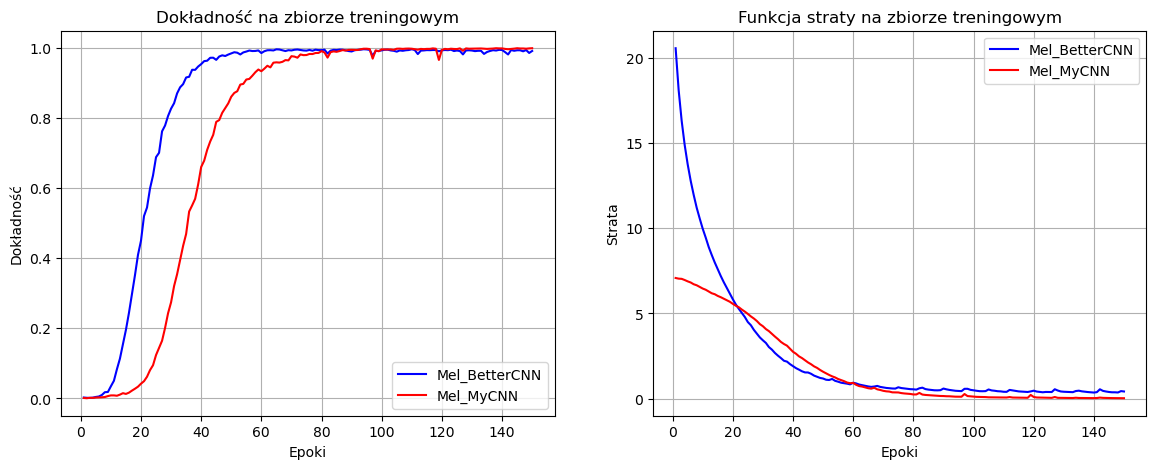

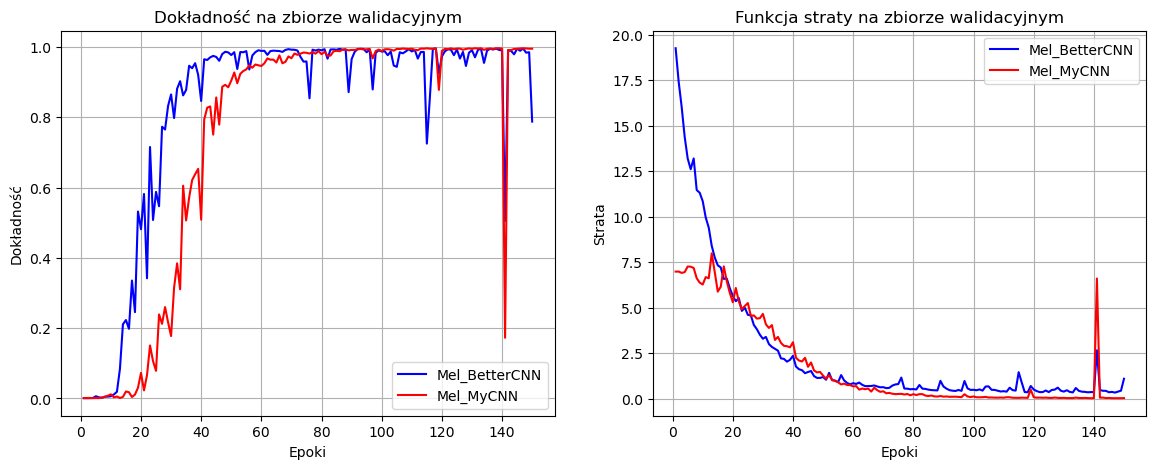

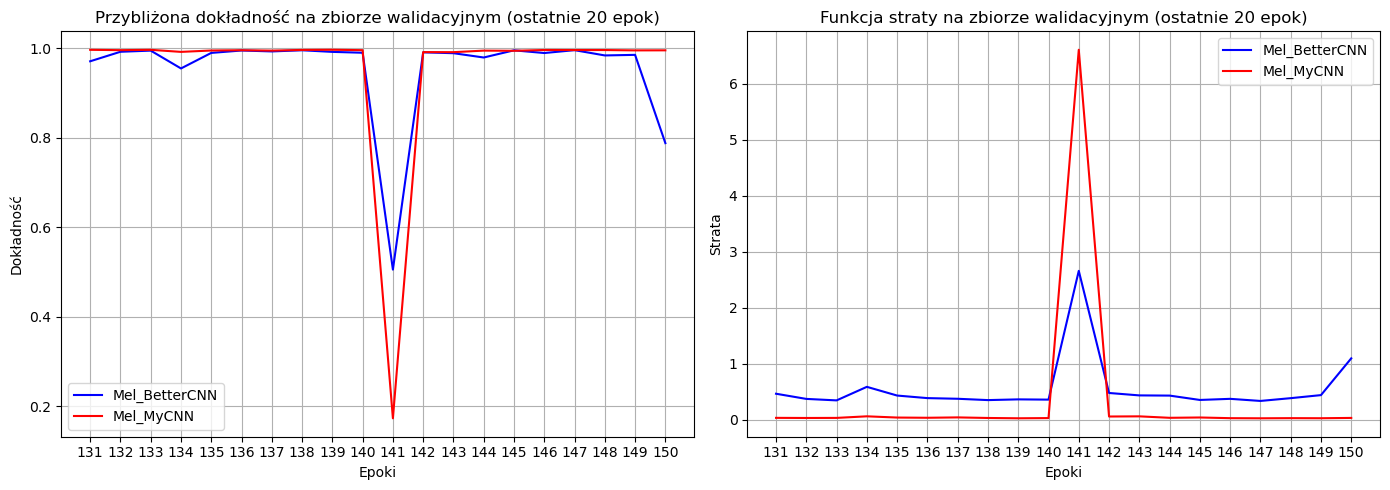

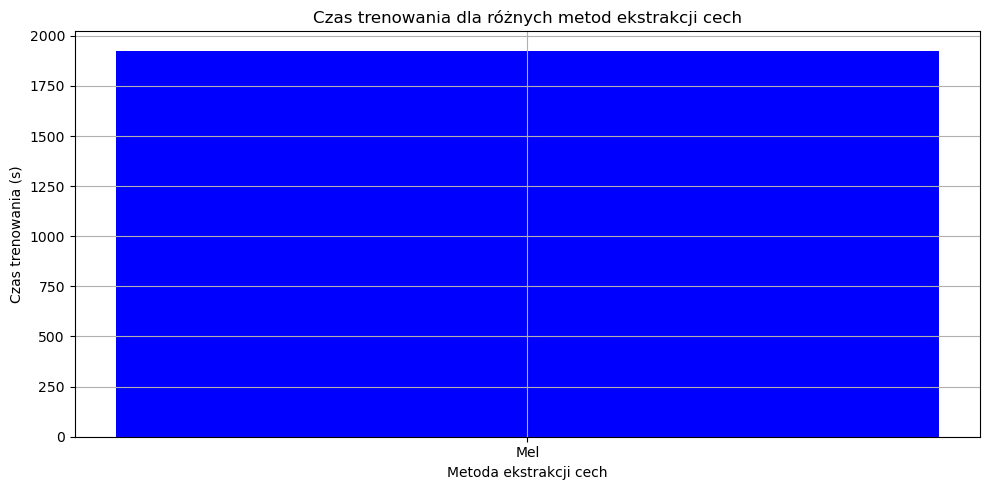

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# List of numpy files
history_files = [
    'data/50_speakers_dataset/50_speakers_audio_data/results/history_30s-Mel-BetterCNN-1024hops-512nfft-442.5s_traintime.npy',
    'data/50_speakers_dataset/50_speakers_audio_data/results/history_30s-Mel-MyCNN-1024hops-512nfft-682.8s_traintime.npy'
]

# List of numpy files
history_files = [
    'data/LibreSpeech/train-clean-360/results/history_30s-Mel-BetterCNN-1024hops-512nfft-1605.2s_traintime.npy',
    'data/LibreSpeech/train-clean-360/results/history_30s-Mel-MyCNN-1024hops-512nfft-1926.1s_traintime.npy'
]


# Dictionary to hold histories
histories = {}

# Extract feature names from file names
for file in history_files:
    # feature_name = file.split("-")[1] + "_" + file.split("-")[2] # Extract the part after "30s-" # 50speakers
    feature_name = file.split("-")[3] + "_" + file.split("-")[4] # Extract the part after "30s-" # libri
    history = np.load(file, allow_pickle=True).item()
    histories[feature_name] = history


colors = ['b', 'r']

# Create subplots for training metrics
fig1, axs1 = plt.subplots(1, 2, figsize=(14, 5))

# Plot training accuracy and loss
for i, (feature_name, history) in enumerate(histories.items()):
    epochs = range(1, len(history['accuracy']) + 1)
    axs1[0].plot(epochs, history['accuracy'], color=colors[i], label=feature_name)
    axs1[1].plot(epochs, history['loss'], color=colors[i], label=feature_name)

axs1[0].set_title('Dokładność na zbiorze treningowym')
axs1[0].set_xlabel('Epoki')
axs1[0].set_ylabel('Dokładność')
axs1[0].legend()
axs1[0].grid(True)

axs1[1].set_title('Funkcja straty na zbiorze treningowym')
axs1[1].set_xlabel('Epoki')
axs1[1].set_ylabel('Strata')
axs1[1].legend()
axs1[1].grid(True)

# Create subplots for validation metrics
fig2, axs2 = plt.subplots(1, 2, figsize=(14, 5))

# Plot validation accuracy and loss
for i, (feature_name, history) in enumerate(histories.items()):
    epochs = range(1, len(history['val_accuracy']) + 1)
    axs2[0].plot(epochs, history['val_accuracy'], color=colors[i], label=feature_name)
    axs2[1].plot(epochs, history['val_loss'], color=colors[i], label=feature_name)

axs2[0].set_title('Dokładność na zbiorze walidacyjnym')
axs2[0].set_xlabel('Epoki')
axs2[0].set_ylabel('Dokładność')
axs2[0].legend()
axs2[0].grid(True)

axs2[1].set_title('Funkcja straty na zbiorze walidacyjnym')
axs2[1].set_xlabel('Epoki')
axs2[1].set_ylabel('Strata')
axs2[1].legend()
axs2[1].grid(True)

# Create a new figure for zoomed validation accuracy and loss
fig3, axs3 = plt.subplots(1, 2, figsize=(14, 5))

# Plot zoomed validation accuracy and loss for the last 20 epochs
for i, (feature_name, history) in enumerate(histories.items()):
    start_epoch = max(0, len(history['val_accuracy']) - 20)
    epochs = range(start_epoch + 1, len(history['val_accuracy']) + 1)
    val_accuracy_zoomed = history['val_accuracy'][start_epoch:]
    val_loss_zoomed = history['val_loss'][start_epoch:]
    axs3[0].plot(epochs, val_accuracy_zoomed, color=colors[i], label=feature_name)
    axs3[1].plot(epochs, val_loss_zoomed, color=colors[i], label=feature_name)

axs3[0].set_title('Przybliżona dokładność na zbiorze walidacyjnym (ostatnie 20 epok)')
axs3[0].set_xlabel('Epoki')
axs3[0].set_ylabel('Dokładność')
axs3[0].legend()
axs3[0].grid(True)

axs3[1].set_title('Funkcja straty na zbiorze walidacyjnym (ostatnie 20 epok)')
axs3[1].set_xlabel('Epoki')
axs3[1].set_ylabel('Strata')
axs3[1].legend()
axs3[1].grid(True)

# Set x-ticks to show only integer values
axs3[0].set_xticks(np.arange(start_epoch + 1, len(history['val_accuracy']) + 1, 1))
axs3[1].set_xticks(np.arange(start_epoch + 1, len(history['val_loss']) + 1, 1))


plt.tight_layout()
plt.show()


# Extract training times from file names
train_times = {}
for file in history_files:
    train_time = float(file.split("-")[-1].split("_")[0][:-1])  # Extract the part before "_traintime"
    feature_name = file.split("30s-")[1].split("-")[0]
    train_times[feature_name] = train_time

# ... (kod dla wykresów accuracy i loss bez zmian)

# Create a bar plot for training times
fig4, ax4 = plt.subplots(figsize=(10, 5))
ax4.bar(train_times.keys(), train_times.values(), color=colors)
ax4.set_title('Czas trenowania dla różnych metod ekstrakcji cech')
ax4.set_xlabel('Metoda ekstrakcji cech')
ax4.set_ylabel('Czas trenowania (s)')
ax4.grid(True)

plt.tight_layout()
plt.show()

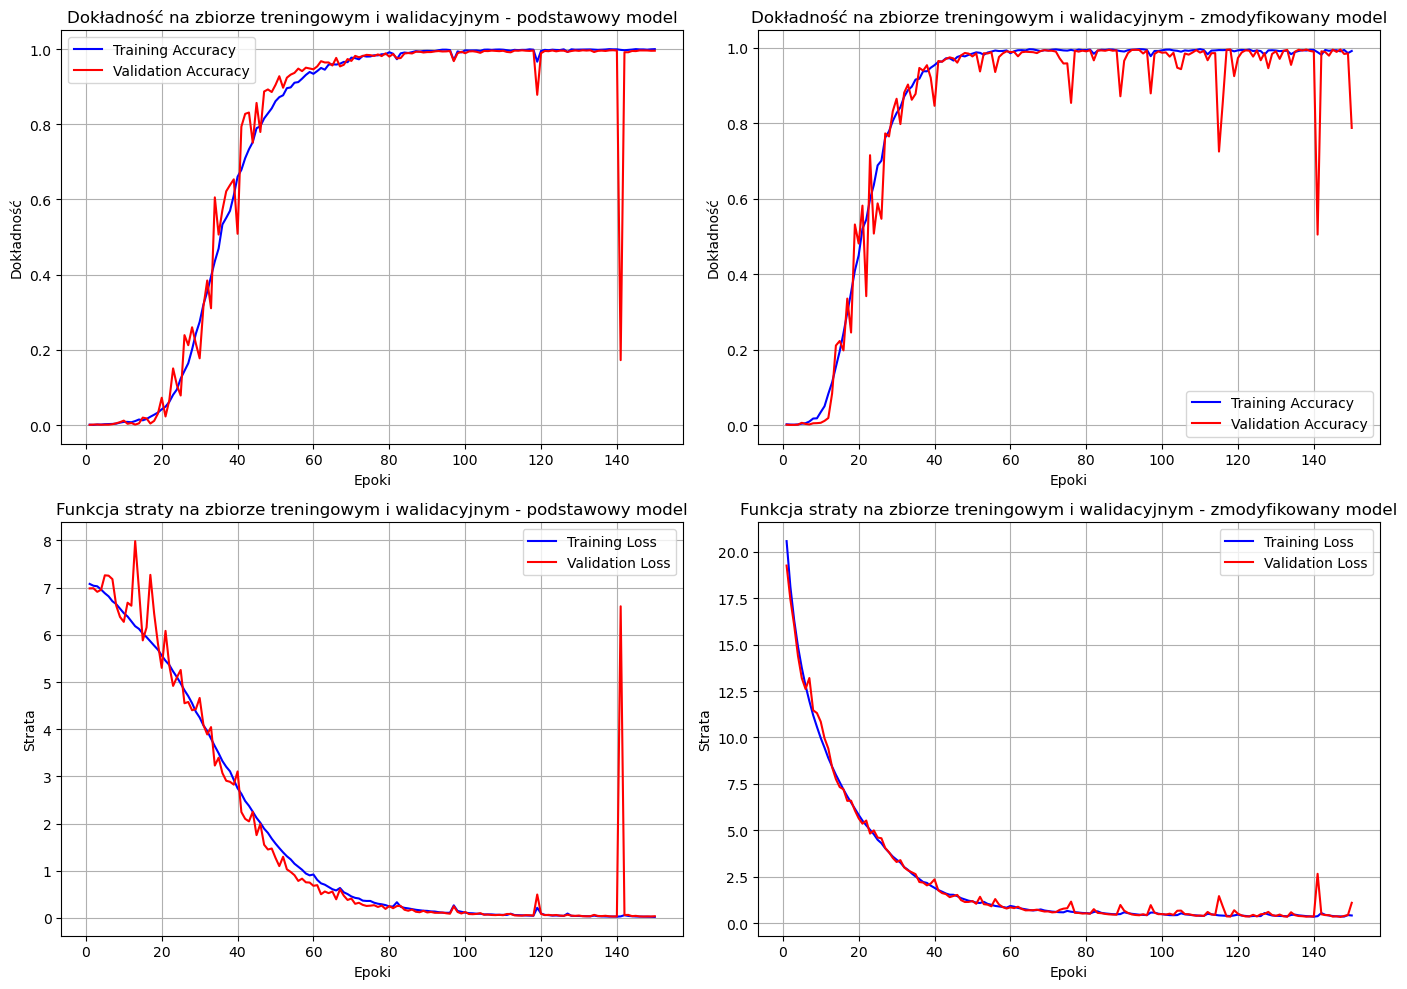

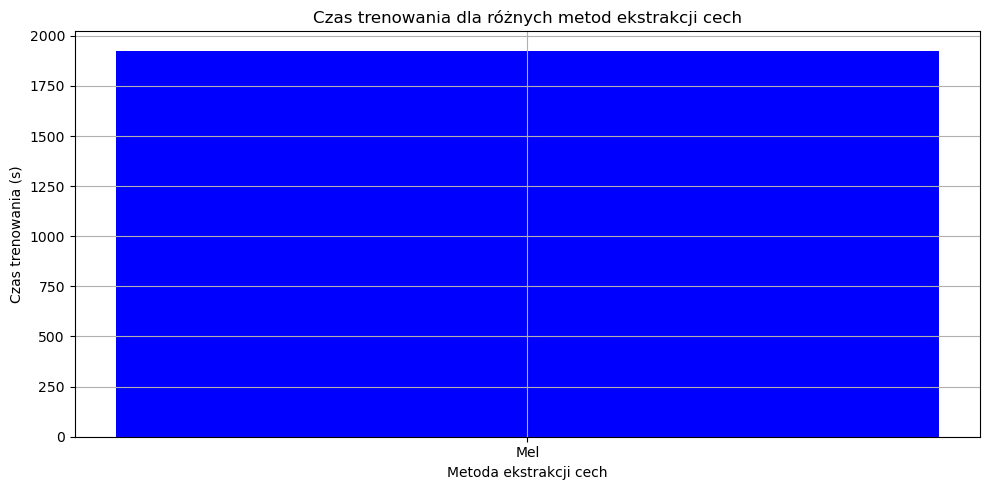

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# List of numpy files
# history_files = [
#     'data/50_speakers_dataset/50_speakers_audio_data/results/history_30s-Mel-BetterCNN-1024hops-512nfft-442.5s_traintime.npy',
#     'data/50_speakers_dataset/50_speakers_audio_data/results/history_30s-Mel-MyCNN-1024hops-512nfft-682.8s_traintime.npy'
# ]


# List of numpy files
history_files = [
    'data/LibreSpeech/train-clean-360/results/history_30s-Mel-BetterCNN-1024hops-512nfft-1605.2s_traintime.npy',
    'data/LibreSpeech/train-clean-360/results/history_30s-Mel-MyCNN-1024hops-512nfft-1926.1s_traintime.npy'
]

# Dictionary to hold histories
histories = {}

# Extract feature names from file names
for file in history_files:
    # feature_name = file.split("-")[1] + "_" + file.split("-")[2] # Extract the part after "30s-" # 50speakers
    feature_name = file.split("-")[3] + "_" + file.split("-")[4] # Extract the part after "30s-" # libri
    history = np.load(file, allow_pickle=True).item()
    histories[feature_name] = history

colors = ['b', 'r']
labels = list(histories.keys())

# Create subplots for combined training and validation metrics
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot combined Training and Validation Accuracy
for i, (feature_name, history) in enumerate(histories.items()):
    epochs = range(1, len(history['accuracy']) + 1)
    
    if i == 0:
        # Plot for first model
        axs[0, 1].plot(epochs, history['accuracy'], color='b', label='Training Accuracy')
        axs[0, 1].plot(epochs, history['val_accuracy'], color='r', label='Validation Accuracy')
        axs[0, 1].set_title(f'Dokładność na zbiorze treningowym i walidacyjnym - zmodyfikowany model')
        axs[0, 1].set_xlabel('Epoki')
        axs[0, 1].set_ylabel('Dokładność')
        axs[0, 1].legend()
        axs[0, 1].grid(True)
    else:
        # Plot for second model
        axs[0, 0].plot(epochs, history['accuracy'], color='b', label='Training Accuracy')
        axs[0, 0].plot(epochs, history['val_accuracy'], color='r', label='Validation Accuracy')
        axs[0, 0].set_title(f'Dokładność na zbiorze treningowym i walidacyjnym - podstawowy model')
        axs[0, 0].set_xlabel('Epoki')
        axs[0, 0].set_ylabel('Dokładność')
        axs[0, 0].legend()
        axs[0, 0].grid(True)

# Plot combined Training and Validation Loss
for i, (feature_name, history) in enumerate(histories.items()):
    epochs = range(1, len(history['loss']) + 1)
    
    if i == 0:
        # Plot for first model
        axs[1, 1].plot(epochs, history['loss'], color='b', label='Training Loss')
        axs[1, 1].plot(epochs, history['val_loss'], color='r', label='Validation Loss')
        axs[1, 1].set_title(f'Funkcja straty na zbiorze treningowym i walidacyjnym - zmodyfikowany model')
        axs[1, 1].set_xlabel('Epoki')
        axs[1, 1].set_ylabel('Strata')
        axs[1, 1].legend()
        axs[1, 1].grid(True)
    else:
        # Plot for second model
        axs[1, 0].plot(epochs, history['loss'], color='b', label='Training Loss')
        axs[1, 0].plot(epochs, history['val_loss'], color='r', label='Validation Loss')
        axs[1, 0].set_title(f'Funkcja straty na zbiorze treningowym i walidacyjnym - podstawowy model')
        axs[1, 0].set_xlabel('Epoki')
        axs[1, 0].set_ylabel('Strata')
        axs[1, 0].legend()
        axs[1, 0].grid(True)


plt.tight_layout()
plt.show()

# Extract training times from file names
train_times = {}
for file in history_files:
    train_time = float(file.split("-")[-1].split("_")[0][:-1])  # Extract the part before "_traintime"
    feature_name = file.split("30s-")[1].split("-")[0]
    train_times[feature_name] = train_time

# Create a bar plot for training times
fig4, ax4 = plt.subplots(figsize=(10, 5))
ax4.bar(train_times.keys(), train_times.values(), color=colors)
ax4.set_title('Czas trenowania dla różnych metod ekstrakcji cech')
ax4.set_xlabel('Metoda ekstrakcji cech')
ax4.set_ylabel('Czas trenowania (s)')
ax4.grid(True)

plt.tight_layout()
plt.show()


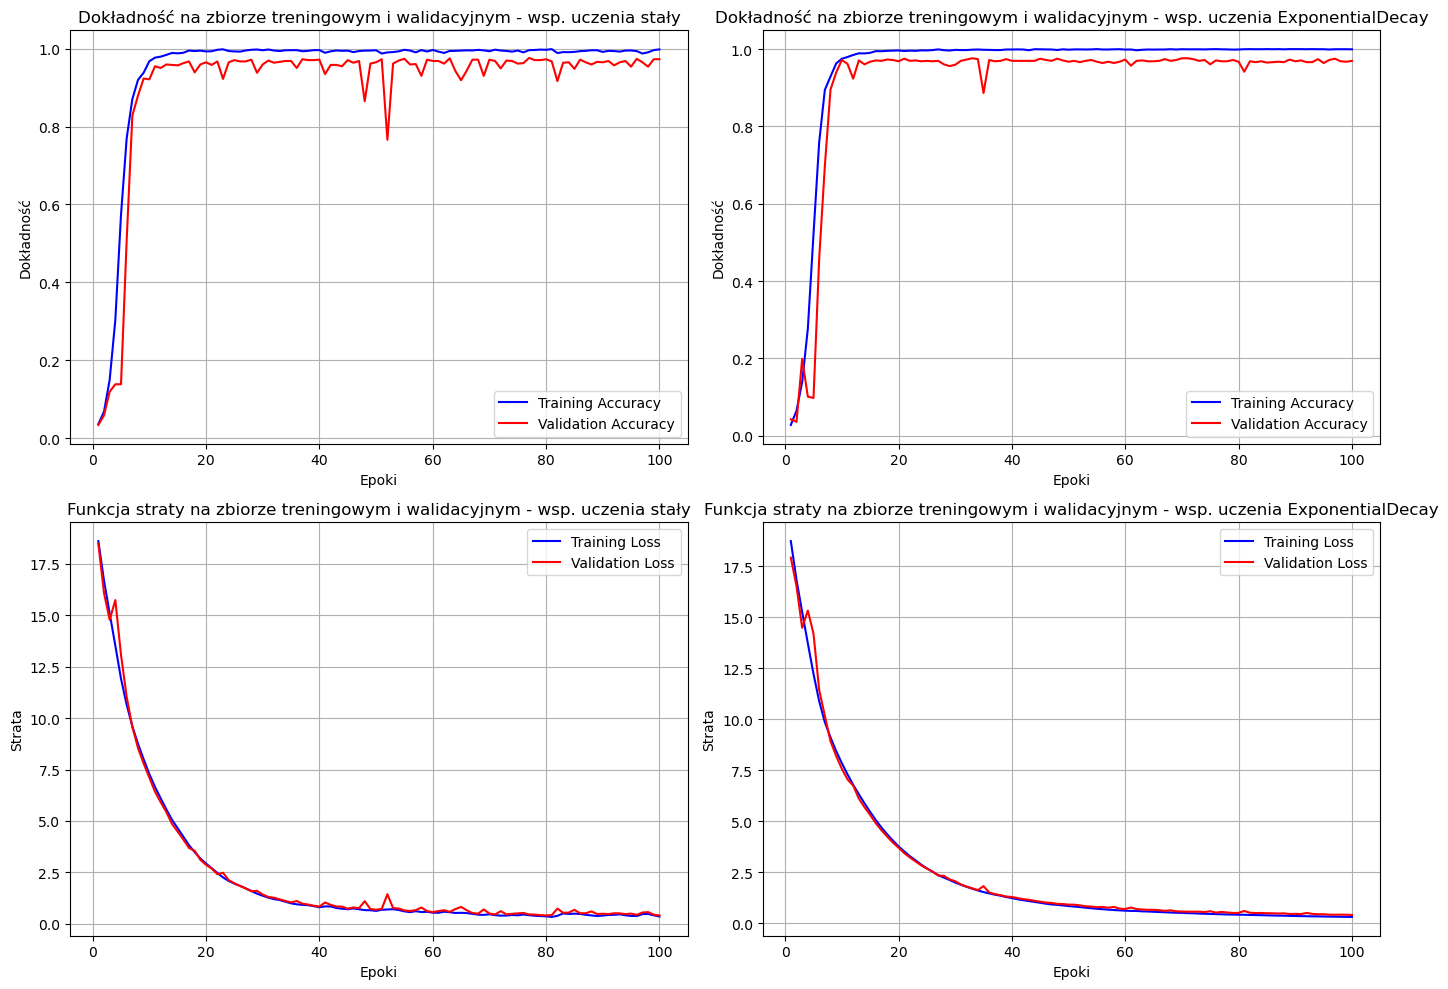

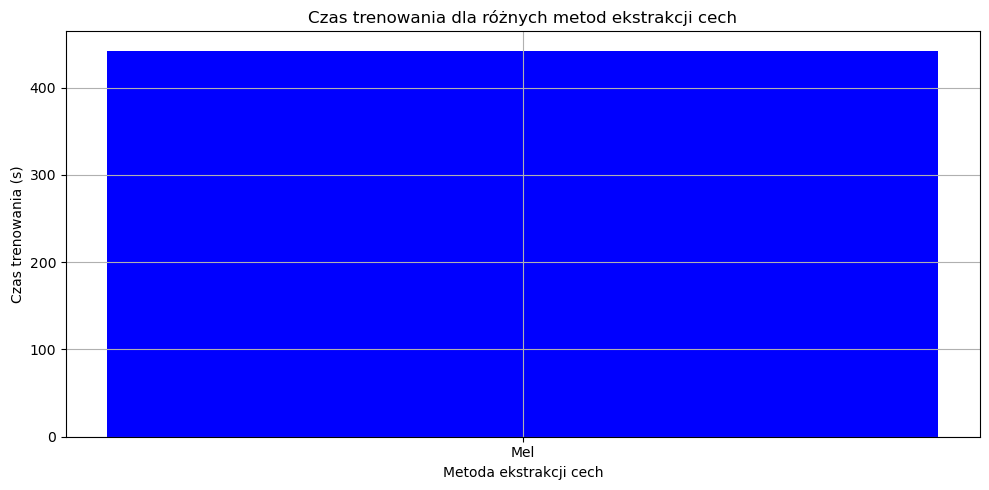

In [5]:
import numpy as np
import matplotlib.pyplot as plt

history_files = [
    'data/50_speakers_dataset/50_speakers_audio_data/results/history_30s-Mel-BetterCNN-1024hops-512nfft-434.3s_traintime.npy',
    'data/50_speakers_dataset/50_speakers_audio_data/results/history_30s-Mel-BetterCNN-1024hops-512nfft-442.5s_traintime.npy'
]



# Dictionary to hold histories
histories = {}

# Extract feature names from file names
i=0
for file in history_files:
    if i == 0:
        feature_name = file.split("-")[1] + "_" + file.split("-")[2] + "lr_decay" # Extract the part after "30s-" # 50speakers
        # feature_name = file.split("-")[3] + "_" + file.split("-")[4] # Extract the part after "30s-" # libri
    else:
        feature_name = file.split("-")[1] + "_" + file.split("-")[2] + "lr_const" # Extract the part after "30s-" # 50speakers
        # feature_name = file.split("-")[3] + "_" + file.split("-")[4] # Extract the part after "30s-" # libri

    i+=1
    history = np.load(file, allow_pickle=True).item()
    histories[feature_name] = history

colors = ['b', 'r']
labels = list(histories.keys())

# Create subplots for combined training and validation metrics
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot combined Training and Validation Accuracy
for i, (feature_name, history) in enumerate(histories.items()):
    epochs = range(1, len(history['accuracy']) + 1)
    
    if i == 0:
        # Plot for first model
        axs[0, 1].plot(epochs, history['accuracy'], color='b', label='Training Accuracy')
        axs[0, 1].plot(epochs, history['val_accuracy'], color='r', label='Validation Accuracy')
        axs[0, 1].set_title(f'Dokładność na zbiorze treningowym i walidacyjnym - wsp. uczenia ExponentialDecay')
        axs[0, 1].set_xlabel('Epoki')
        axs[0, 1].set_ylabel('Dokładność')
        axs[0, 1].legend()
        axs[0, 1].grid(True)
    else:
        # Plot for second model
        axs[0, 0].plot(epochs, history['accuracy'], color='b', label='Training Accuracy')
        axs[0, 0].plot(epochs, history['val_accuracy'], color='r', label='Validation Accuracy')
        axs[0, 0].set_title(f'Dokładność na zbiorze treningowym i walidacyjnym - wsp. uczenia stały')
        axs[0, 0].set_xlabel('Epoki')
        axs[0, 0].set_ylabel('Dokładność')
        axs[0, 0].legend()
        axs[0, 0].grid(True)

# Plot combined Training and Validation Loss
for i, (feature_name, history) in enumerate(histories.items()):
    epochs = range(1, len(history['loss']) + 1)
    
    if i == 0:
        # Plot for first model
        axs[1, 1].plot(epochs, history['loss'], color='b', label='Training Loss')
        axs[1, 1].plot(epochs, history['val_loss'], color='r', label='Validation Loss')
        axs[1, 1].set_title(f'Funkcja straty na zbiorze treningowym i walidacyjnym - wsp. uczenia ExponentialDecay')
        axs[1, 1].set_xlabel('Epoki')
        axs[1, 1].set_ylabel('Strata')
        axs[1, 1].legend()
        axs[1, 1].grid(True)
    else:
        # Plot for second model
        axs[1, 0].plot(epochs, history['loss'], color='b', label='Training Loss')
        axs[1, 0].plot(epochs, history['val_loss'], color='r', label='Validation Loss')
        axs[1, 0].set_title(f'Funkcja straty na zbiorze treningowym i walidacyjnym - wsp. uczenia stały')
        axs[1, 0].set_xlabel('Epoki')
        axs[1, 0].set_ylabel('Strata')
        axs[1, 0].legend()
        axs[1, 0].grid(True)


plt.tight_layout()
plt.show()

# Extract training times from file names
train_times = {}
for file in history_files:
    train_time = float(file.split("-")[-1].split("_")[0][:-1])  # Extract the part before "_traintime"
    feature_name = file.split("30s-")[1].split("-")[0]
    train_times[feature_name] = train_time

# Create a bar plot for training times
fig4, ax4 = plt.subplots(figsize=(10, 5))
ax4.bar(train_times.keys(), train_times.values(), color=colors)
ax4.set_title('Czas trenowania dla różnych metod ekstrakcji cech')
ax4.set_xlabel('Metoda ekstrakcji cech')
ax4.set_ylabel('Czas trenowania (s)')
ax4.grid(True)

plt.tight_layout()
plt.show()


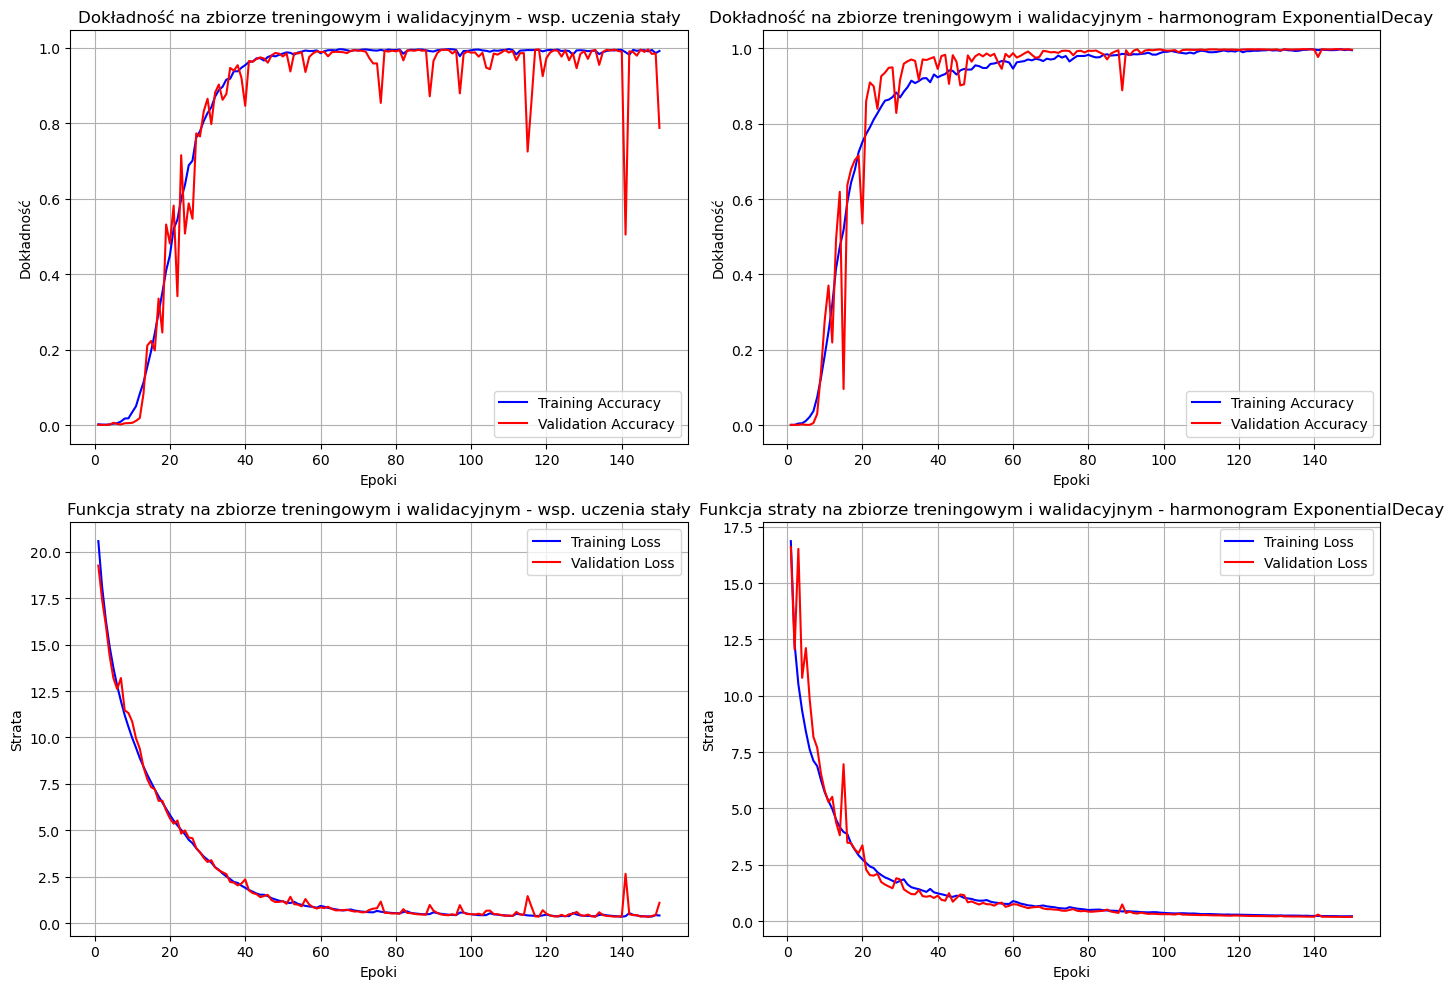

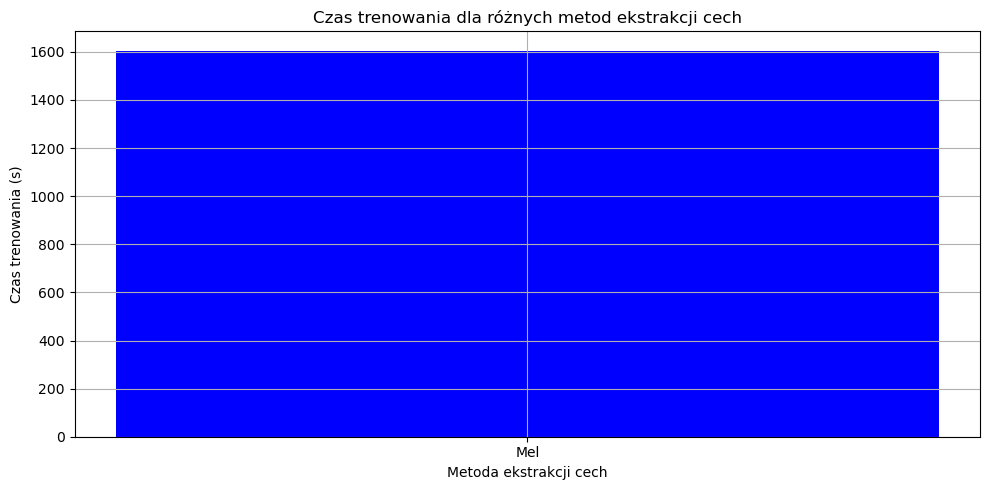

In [7]:
import numpy as np
import matplotlib.pyplot as plt

history_files = [
    'data/LibreSpeech/train-clean-360/results/history_30s-Mel-BetterCNN-1024hops-512nfft-1584.6s_traintime.npy',
    'data/LibreSpeech/train-clean-360/results/history_30s-Mel-BetterCNN-1024hops-512nfft-1605.2s_traintime.npy'
]



# Dictionary to hold histories
histories = {}

# Extract feature names from file names
i=0
for file in history_files:
    if i == 0:
        # feature_name = file.split("-")[1] + "_" + file.split("-")[2] + "lr_decay" # Extract the part after "30s-" # 50speakers
        feature_name = file.split("-")[3] + "_" + file.split("-")[4] + "lr_decay" # Extract the part after "30s-" # libri
    else:
        # feature_name = file.split("-")[1] + "_" + file.split("-")[2] + "lr_const" # Extract the part after "30s-" # 50speakers
        feature_name = file.split("-")[3] + "_" + file.split("-")[4] + "lr_const" # Extract the part after "30s-" # libri

    i+=1
    history = np.load(file, allow_pickle=True).item()
    histories[feature_name] = history

colors = ['b', 'r']
labels = list(histories.keys())

# Create subplots for combined training and validation metrics
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot combined Training and Validation Accuracy
for i, (feature_name, history) in enumerate(histories.items()):
    epochs = range(1, len(history['accuracy']) + 1)
    
    if i == 0:
        # Plot for first model
        axs[0, 1].plot(epochs, history['accuracy'], color='b', label='Training Accuracy')
        axs[0, 1].plot(epochs, history['val_accuracy'], color='r', label='Validation Accuracy')
        axs[0, 1].set_title(f'Dokładność na zbiorze treningowym i walidacyjnym - harmonogram ExponentialDecay')
        axs[0, 1].set_xlabel('Epoki')
        axs[0, 1].set_ylabel('Dokładność')
        axs[0, 1].legend()
        axs[0, 1].grid(True)
    else:
        # Plot for second model
        axs[0, 0].plot(epochs, history['accuracy'], color='b', label='Training Accuracy')
        axs[0, 0].plot(epochs, history['val_accuracy'], color='r', label='Validation Accuracy')
        axs[0, 0].set_title(f'Dokładność na zbiorze treningowym i walidacyjnym - wsp. uczenia stały')
        axs[0, 0].set_xlabel('Epoki')
        axs[0, 0].set_ylabel('Dokładność')
        axs[0, 0].legend()
        axs[0, 0].grid(True)

# Plot combined Training and Validation Loss
for i, (feature_name, history) in enumerate(histories.items()):
    epochs = range(1, len(history['loss']) + 1)
    
    if i == 0:
        # Plot for first model
        axs[1, 1].plot(epochs, history['loss'], color='b', label='Training Loss')
        axs[1, 1].plot(epochs, history['val_loss'], color='r', label='Validation Loss')
        axs[1, 1].set_title(f'Funkcja straty na zbiorze treningowym i walidacyjnym - harmonogram ExponentialDecay')
        axs[1, 1].set_xlabel('Epoki')
        axs[1, 1].set_ylabel('Strata')
        axs[1, 1].legend()
        axs[1, 1].grid(True)
    else:
        # Plot for second model
        axs[1, 0].plot(epochs, history['loss'], color='b', label='Training Loss')
        axs[1, 0].plot(epochs, history['val_loss'], color='r', label='Validation Loss')
        axs[1, 0].set_title(f'Funkcja straty na zbiorze treningowym i walidacyjnym - wsp. uczenia stały')
        axs[1, 0].set_xlabel('Epoki')
        axs[1, 0].set_ylabel('Strata')
        axs[1, 0].legend()
        axs[1, 0].grid(True)


plt.tight_layout()
plt.show()

# Extract training times from file names
train_times = {}
for file in history_files:
    train_time = float(file.split("-")[-1].split("_")[0][:-1])  # Extract the part before "_traintime"
    feature_name = file.split("30s-")[1].split("-")[0]
    train_times[feature_name] = train_time

# Create a bar plot for training times
fig4, ax4 = plt.subplots(figsize=(10, 5))
ax4.bar(train_times.keys(), train_times.values(), color=colors)
ax4.set_title('Czas trenowania dla różnych metod ekstrakcji cech')
ax4.set_xlabel('Metoda ekstrakcji cech')
ax4.set_ylabel('Czas trenowania (s)')
ax4.grid(True)

plt.tight_layout()
plt.show()